In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter

In [45]:
df = pd.read_csv("2010-Nov2021.csv")

In [46]:
df.columns

Index(['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6',
       'Column 7', 'Column 8', 'Column 9', 'Column 10', 'Column 11',
       'Column 12', 'Column 13', 'Column 14', 'Column 15', 'Column 16',
       'Column 17', 'Column 18', 'Column 19', 'Column 20'],
      dtype='object')

In [47]:
df = df.rename(columns={'Column 1': 'Ticket #', 'Column 2': 'Winning #'})
df.head()

,Ticket #,Winning #,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19,Column 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-May-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2965,5|9|18|19|20,No Data,"$180,050.24",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03-May-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2966,2|3|9|15|19,No Data,"$150,373.93",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df1 = df[['Ticket #', 'Winning #']]

In [49]:
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
df1.head()

,Ticket #,Winning #
0,2965,5|9|18|19|20
1,2966,2|3|9|15|19
2,2967,4|5|9|12|13
3,2968,2|7|10|16|18
4,2969,2|7|10|13|17


In [50]:
win = df1['Winning #']
win = win.str.replace('|', " ")

In [51]:
# Create an empty list 
Row_list =[] 
  
# Iterate over each row 
for rows in win: 
    # Create list for the current row 
    my_list = rows
    l = [int(s) for s in my_list.split() if s.isdigit()]
      
    # append the list to the final list 
    Row_list.append(l) 
  
# Print the list 
len(Row_list) 

3423

In [53]:
df1 = df1.drop(columns = ['Winning #'])
df1["Winning #"] = Row_list

In [54]:
df1.head()

,Ticket #,Winning #
0,2965,"[5, 9, 18, 19, 20]"
1,2966,"[2, 3, 9, 15, 19]"
2,2967,"[4, 5, 9, 12, 13]"
3,2968,"[2, 7, 10, 16, 18]"
4,2969,"[2, 7, 10, 13, 17]"


In [55]:
all_ = df1["Winning #"]
all_.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[3, 4, 5, 7, 19]       3
[4, 8, 12, 16, 19]     3
[1, 10, 14, 16, 19]    3
[1, 5, 7, 14, 16]      3
[1, 6, 8, 15, 20]      3
                      ..
[2, 5, 13, 14, 20]     1
[2, 6, 7, 15, 17]      1
[5, 6, 15, 17, 18]     1
[2, 5, 8, 9, 15]       1
[1, 4, 5, 8, 19]       1
Name: Winning #, Length: 3063, dtype: int64

In [11]:
def flatten(seq, container=None):
    if container is None:
        container = []

    for s in seq:
        try:
            iter(s)  # check if it's iterable
        except TypeError:
            container.append(s)
        else:
            flatten(s, container)

    return container

In [56]:
a = flatten(Row_list)
new = []

for i in range(1,21):
    new.append(a.count(i))
    
num = []

for i in range(1,21):
    num.append(i)

In [57]:
data = {'Number':  num, 'Occurrence': new}
df2 = pd.DataFrame(data, columns = ['Number', 'Occurrence'])

df2

,Number,Occurrence
0,1,833
1,2,857
2,3,829
3,4,857
4,5,885
5,6,831
6,7,899
7,8,846
8,9,908
9,10,869


In [58]:
df2.sort_values(by=['Occurrence'], ascending = False)

,Number,Occurrence
8,9,908
6,7,899
4,5,885
11,12,873
15,16,870
9,10,869
10,11,864
14,15,864
13,14,858
3,4,857


In [15]:
tot = np.sum(df2["Occurrence"])

occ = df2["Occurrence"]
prob = []

for i in occ:
    temp = round(i/tot , 3)
    prob.append(temp)

In [16]:
df2['Probability'] = prob
df2.sort_values(by=['Occurrence'], ascending = False)

,Number,Occurrence,Probability
6,7,298,0.056
14,15,291,0.055
10,11,289,0.054
1,2,280,0.053
8,9,275,0.052
13,14,272,0.051
9,10,270,0.051
5,6,269,0.050
4,5,268,0.050
18,19,267,0.050


In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

/home/emilo/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number', ylabel='Probability'>

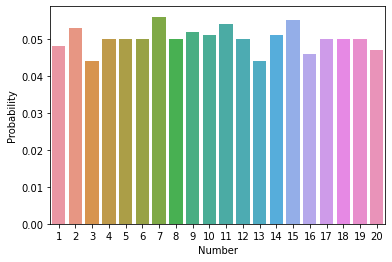

In [18]:
sns.barplot(df2["Number"],df2["Probability"])

In [28]:
import itertools

In [29]:
def combinations(array, tuple_length, prev_array=[]):
    if len(prev_array) == tuple_length:
        return [prev_array]
    combs = []
    for i, val in enumerate(array):
        prev_array_extended = prev_array.copy()
        prev_array_extended.append(val)
        combs += combinations(array[i+1:], tuple_length, prev_array_extended)
    return combs

In [110]:
# arr = sorted(df2.sort_values(by=['Occurrence'], ascending = False)[:8]["Number"].tolist())
# arr = [2,5,8,9,11,12,15,16]
arr = [2,5,7,9,10,11,12,15,16]
# arr = [2,5,8,9,11,12,14,17]
pred = combinations(arr, 5)

In [111]:
bools = []
for i in pred:
    bools.append(i in Row_list)
    
    
bools.count(True)
    

17

In [81]:
len(Row_list)

1988

In [82]:
len(pred)

56